 IMPORTING THE NECESSARY LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
print('No.of rows:',df.shape[0])
print('No.of columns:',df.shape[1])

No.of rows: 1461
No.of columns: 6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
df = df.drop('date', axis = 1)

In [10]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

There are no Missing values in the dataset 

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
precipitation,1461.0,3.029432,6.680194,0.0,0.0,0.0,2.8,55.9
temp_max,1461.0,16.439083,7.349758,-1.6,10.6,15.6,22.2,35.6
temp_min,1461.0,8.234771,5.023004,-7.1,4.4,8.3,12.2,18.3
wind,1461.0,3.241136,1.437825,0.4,2.2,3.0,4.0,9.5


In [14]:
num_col = df.select_dtypes(np.number)

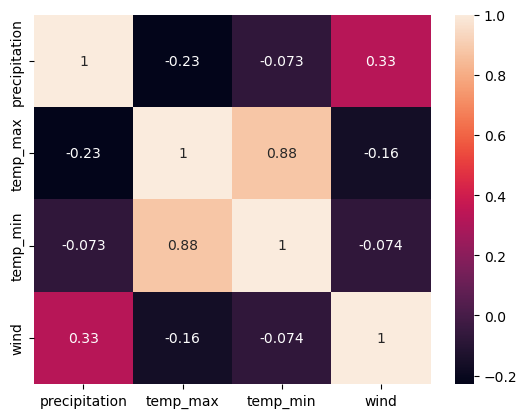

In [21]:
# Heatmap
sns.heatmap(num_col.corr(), annot = True)
plt.show()

In [23]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [25]:
# Encoding for the categorical column
df = df.replace(to_replace=['rain','sun','fog','drizzle','snow'], value = [1,2,3,4,5])

Preparation for model building

In [31]:
# Spliting the dataset for train and test
x = num_col
y = df.weather

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .30, random_state = 42)

In [35]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(1022, 4)
(1022,)
(439, 4)
(439,)


Model building

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix


In [41]:
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)

#prediction
ypred = model_lr.predict(xtest)

# Accuracy score

print(classification_report(ytest,ypred))
print('accuracy:', accuracy_score(ytest,ypred))

              precision    recall  f1-score   support

           1       0.96      0.92      0.94       192
           2       0.76      1.00      0.86       193
           3       0.00      0.00      0.00        32
           4       0.00      0.00      0.00        14
           5       1.00      0.12      0.22         8

    accuracy                           0.85       439
   macro avg       0.54      0.41      0.41       439
weighted avg       0.77      0.85      0.80       439

accuracy: 0.8451025056947609


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Naive Bayes
model_nb = GaussianNB()

model_nb.fit(xtrain,ytrain)

#prediction
ypred_nb = model_nb.predict(xtest)

# Accuracy score

print(classification_report(ytest,ypred_nb))
print('accuracy:', accuracy_score(ytest,ypred_nb))

              precision    recall  f1-score   support

           1       0.98      0.90      0.94       192
           2       0.77      0.98      0.86       193
           3       0.00      0.00      0.00        32
           4       0.33      0.14      0.20        14
           5       0.50      0.50      0.50         8

    accuracy                           0.84       439
   macro avg       0.52      0.51      0.50       439
weighted avg       0.78      0.84      0.80       439

accuracy: 0.8405466970387244


In [46]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

#prediction
ypred_dt = model_dt.predict(xtest)

# Accuracy score

print(classification_report(ytest,ypred_dt))
print('accuracy:', accuracy_score(ytest,ypred_dt))

              precision    recall  f1-score   support

           1       0.90      0.89      0.89       192
           2       0.78      0.73      0.75       193
           3       0.24      0.28      0.26        32
           4       0.05      0.07      0.06        14
           5       0.30      0.38      0.33         8

    accuracy                           0.74       439
   macro avg       0.45      0.47      0.46       439
weighted avg       0.76      0.74      0.75       439

accuracy: 0.7403189066059226


In [47]:
# Random Forest

model_rf = RandomForestClassifier()

model_rf.fit(xtrain,ytrain)

#prediction

ypred_rf = model_rf.predict(xtest)

# Accuracy score

print(classification_report(ytest,ypred_rf))
print('accuracy:', accuracy_score(ytest,ypred_rf))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       192
           2       0.77      0.94      0.85       193
           3       0.23      0.09      0.13        32
           4       0.20      0.07      0.11        14
           5       0.33      0.25      0.29         8

    accuracy                           0.82       439
   macro avg       0.50      0.45      0.46       439
weighted avg       0.79      0.82      0.80       439

accuracy: 0.8246013667425968
